- Create a histogram with 10 bins to visualize the distribution of the amount. Show the plot.

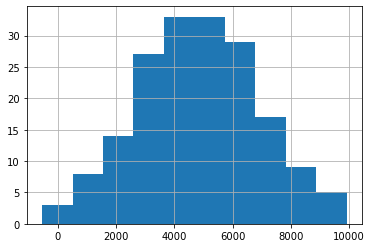

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

amir_deals =pd.read_csv("amir_deals.csv")
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

- What's the probability of Amir closing a deal worth less than $7500?

In [3]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)

print(prob_less_7500)

0.8943502263331446


- What's the probability of Amir closing a deal worth more than $1000?

In [4]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

0.9772498680518208


- What's the probability of Amir closing a deal worth between $3000 and $7000?

In [5]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


- What amount will 25% of Amir's sales be less than?

In [6]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


- Currently, Amir's average sale amount is $5000. Calculate what his new average amount will be if it increases by 20% and store this in new_mean.
- Amir's current standard deviation is $2000. Calculate what his new standard deviation will be if it increases by 30% and store this in new_sd.
- Create a variable called new_sales, which contains 36 simulated amounts from a normal distribution with a mean of new_mean and a standard deviation of new_sd.
- Plot the distribution of the new_sales amounts using a histogram and show the plot.

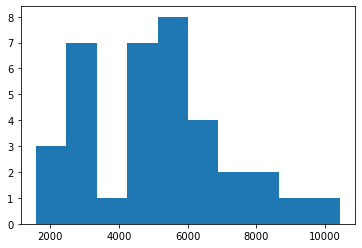

In [7]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

norm from scipy.stats is imported.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

In [11]:
current = 1 - norm.cdf(1000, 5000, 2000)
predicted = 1 - norm.cdf(1000, 6000, 2600)
print(current , predicted)

if current > predicted :
    print("Current is better")
else:
    print("Predicted is better")    

0.9772498680518208 0.9727648049862613
Current is better


Regardless of the shape of the distribution you're taking sample means from, the central limit theorem will apply if the sampling distribution contains enough sample means.

- Create a histogram of the num_users column of amir_deals and show the plot.

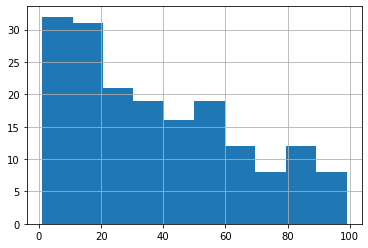

In [12]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

- Set the seed to 104.
- Take a sample of size 20 with replacement from the num_users column of amir_deals, and take the mean.

In [13]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace = True)

# Take mean of samp_20
print(samp_20.mean())

32.0


- Repeat this 100 times using a for loop and store as sample_means. This will take 100 different samples and calculate the mean of each.

In [14]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = samp_20.mean()
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


- Convert sample_means into a pd.Series, create a histogram of the sample_means, and show the plot.

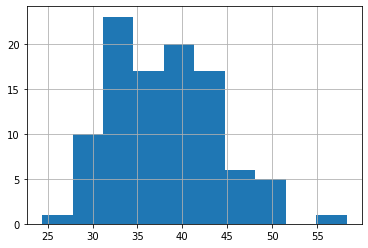

In [15]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

- Set the random seed to 321.
- Take 30 samples (with replacement) of size 20 from all_deals['num_users'] and take the mean of each sample. Store the sample means in sample_means.
- Print the mean of sample_means.
- Print the mean of the num_users column of amir_deals.

In [17]:
# # Set seed to 321
# np.random.seed(321)

# sample_means = []
# # Loop 30 times to take 30 means
# for i in range(30):
#   # Take sample of size 20 from num_users col of all_deals with replacement
#   cur_sample = all_deals['num_users'].sample(20,replace = True)
#   # Take mean of cur_sample
#   cur_mean = cur_sample.mean()
#   # Append cur_mean to sample_means
#   sample_means.append(cur_mean)

# # Print mean of sample_means
# print(np.mean(sample_means))

# # Print mean of num_users in amir_deals
# print(amir_deals['num_users'].mean())

PEAK OF DISTRIBUTION IN A POISSON DIST IS ALWAYS EQUALS TO LAMBDA

- Import poisson from scipy.stats and calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

In [18]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


- Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [19]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


- What's the probability that Amir responds to 2 or fewer leads in a day?

In [20]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


- What's the probability that Amir responds to more than 10 leads in a day?

In [21]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315


- Import expon from scipy.stats. What's the probability it takes Amir less than an hour to respond to a lead? On average, it takes 2.5 hours for him to respond.

In [22]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(60, scale=2.5 * 60))

0.3296799539643607


- What's the probability it takes Amir more than 4 hours to respond to a lead?

In [23]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes > 4 hours
print( 1 - expon.cdf(4 * 60, scale=2.5 * 60))

0.20189651799465536


- What's the probability it takes Amir 3-4 hours to respond to a lead?

In [24]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes 3-4 hours
print(expon.cdf(4 * 60, scale=2.5 * 60) - expon.cdf(3 * 60, scale=2.5 * 60))

0.09929769391754684


regarding the t-distribution:
- The t-distribution has thicker tails than the normal distribution.
- A t-distribution with high degrees of freedom resembles the normal distribution.
- The number of degrees of freedom affects the distribution's variance.